In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [6]:
df = pd.read_csv(r"C:\Users\HP\Desktop\INTERNSHIP -Skillcraft\bank+marketing\bank\bank.csv", sep=";")
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
print(df.isnull().sum())  # Check for missing values


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [10]:
label_encoders = {}
for column in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store encoders for future use


In [12]:
X = df.drop(columns=["y"])  # Features
y = df["y"]  # Target variable


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [18]:
y_pred = clf.predict(X_test)


In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.90


In [22]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.97      0.94       807
           1       0.55      0.33      0.41        98

    accuracy                           0.90       905
   macro avg       0.74      0.65      0.68       905
weighted avg       0.88      0.90      0.89       905



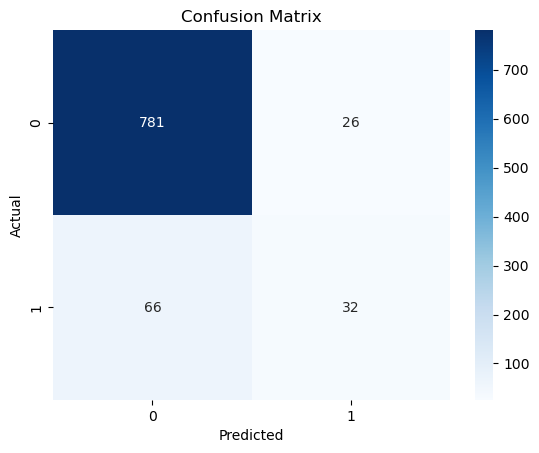

In [24]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


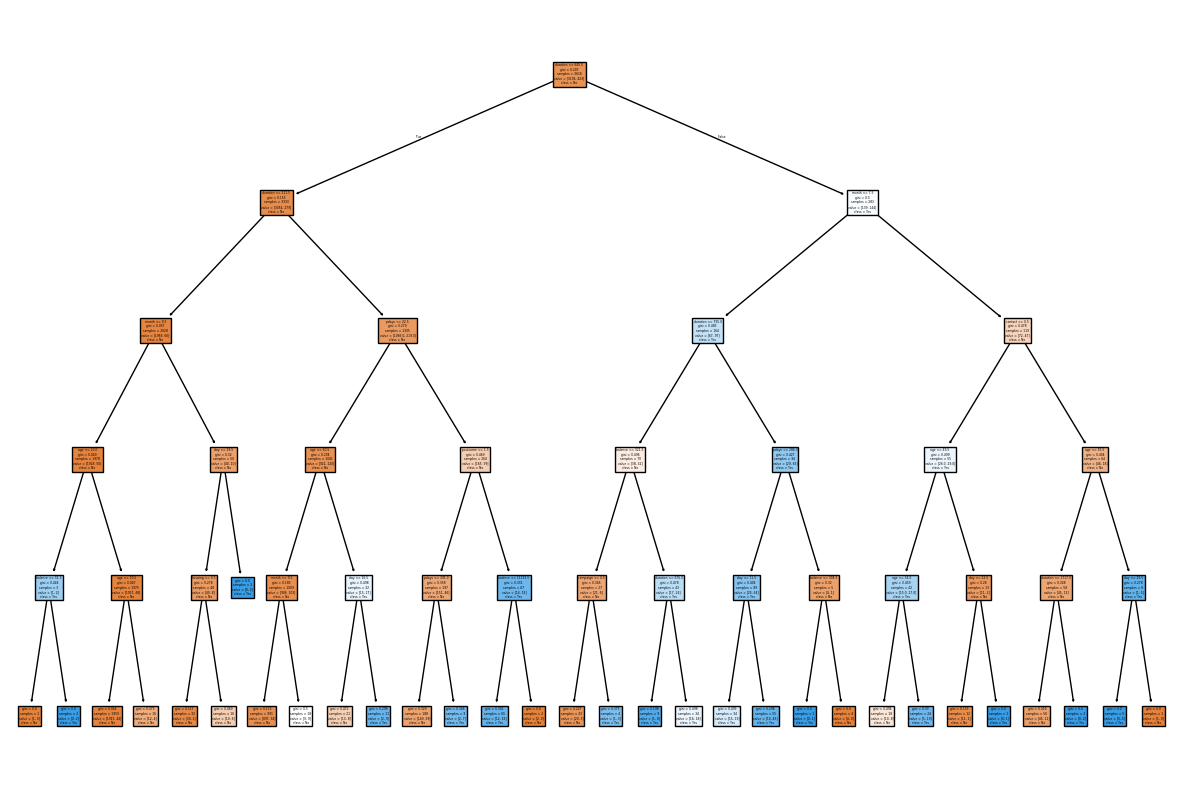

In [26]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.show()


In [28]:
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": clf.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)
print(feature_importances)


      Feature  Importance
11   duration    0.490278
13      pdays    0.134362
15   poutcome    0.114261
0         age    0.098535
10      month    0.051858
9         day    0.042169
5     balance    0.038101
8     contact    0.013163
12   campaign    0.009616
6     housing    0.007658
1         job    0.000000
2     marital    0.000000
3   education    0.000000
4     default    0.000000
7        loan    0.000000
14   previous    0.000000


In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": [3, 5, 10, None], "criterion": ["gini", "entropy"]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'criterion': 'gini', 'max_depth': 5}


In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": [3, 5, 10, None], "criterion": ["gini", "entropy"]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'criterion': 'gini', 'max_depth': 5}
